In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('retention_rate.csv')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1420 entries, 0 to 1419
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cohort_start_date          1420 non-null   object 
 1   order_date                 1420 non-null   object 
 2   cohort_size                1420 non-null   int64  
 3   cohort_size_at_order_date  1420 non-null   int64  
 4   plan                       1420 non-null   object 
 5   currency                   1420 non-null   object 
 6   cohort_age_months          1420 non-null   int64  
 7   retention_rate             1420 non-null   float64
dtypes: float64(1), int64(3), object(4)
memory usage: 88.9+ KB


In [31]:
df.head()

,cohort_start_date,order_date,cohort_size,cohort_size_at_order_date,plan,currency,cohort_age_months,retention_rate
0,2019-01-01 00:00:00+01,2019-01-01 00:00:00+01,1,1,LARGE,EUR,0,1.0
1,2019-01-01 00:00:00+01,2019-01-01 00:00:00+01,8,8,MEDIUM,EUR,0,1.0
2,2019-01-01 00:00:00+01,2019-01-01 00:00:00+01,2,2,LARGE,USD,0,1.0
3,2019-01-01 00:00:00+01,2019-01-01 00:00:00+01,45,45,SMALL,USD,0,1.0
4,2019-01-01 00:00:00+01,2019-01-01 00:00:00+01,49,49,SMALL,EUR,0,1.0


In [32]:
df['cohort_start_date']=df['cohort_start_date'].str[0:7]

In [33]:
df['cohort_start_date'].head(3)

0    2019-01
1    2019-01
2    2019-01
Name: cohort_start_date, dtype: object

In [34]:
df.groupby(by=['currency', 'plan'])['retention_rate'].agg(['mean', 'count'])


mean  count
currency plan                   
EUR      LARGE   0.690069    144
         MEDIUM  0.527004    237
         SMALL   0.666863    255
USD      LARGE   0.766784    199
         MEDIUM  0.502912    285
         SMALL   0.601000    300

In [35]:
columns_to_drop = ['retention_rate', 'cohort_size']

In [36]:
df = df.drop(columns = columns_to_drop, axis = 1)

In [37]:
df.head(2)

,cohort_start_date,order_date,cohort_size_at_order_date,plan,currency,cohort_age_months
0,2019-01,2019-01-01 00:00:00+01,1,LARGE,EUR,0
1,2019-01,2019-01-01 00:00:00+01,8,MEDIUM,EUR,0


In [38]:
df_grouped = df.groupby(['currency','plan'])

In [39]:
df_grouped

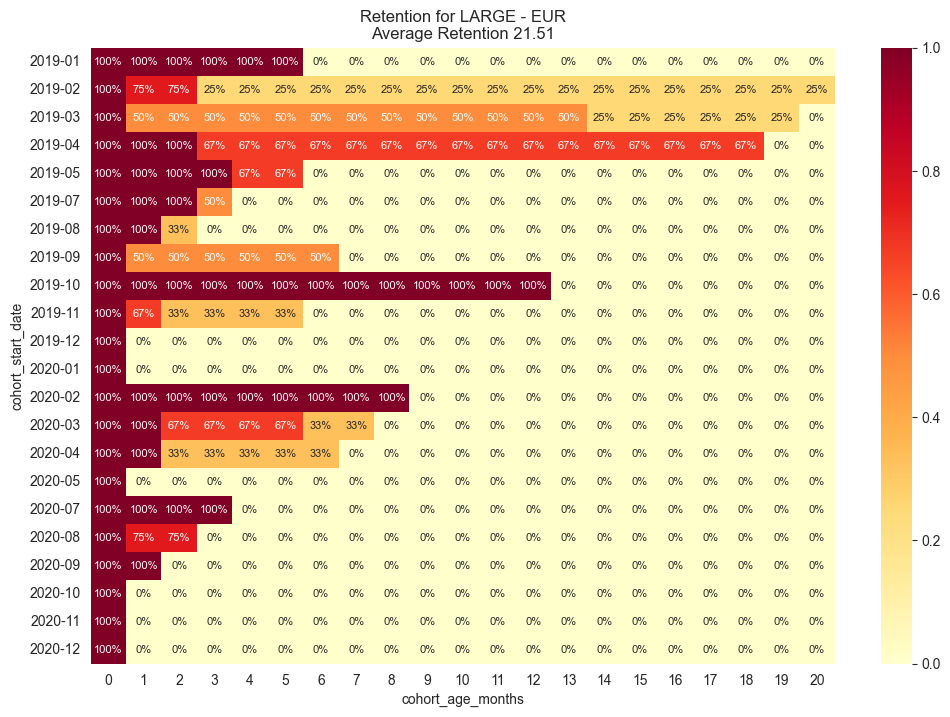

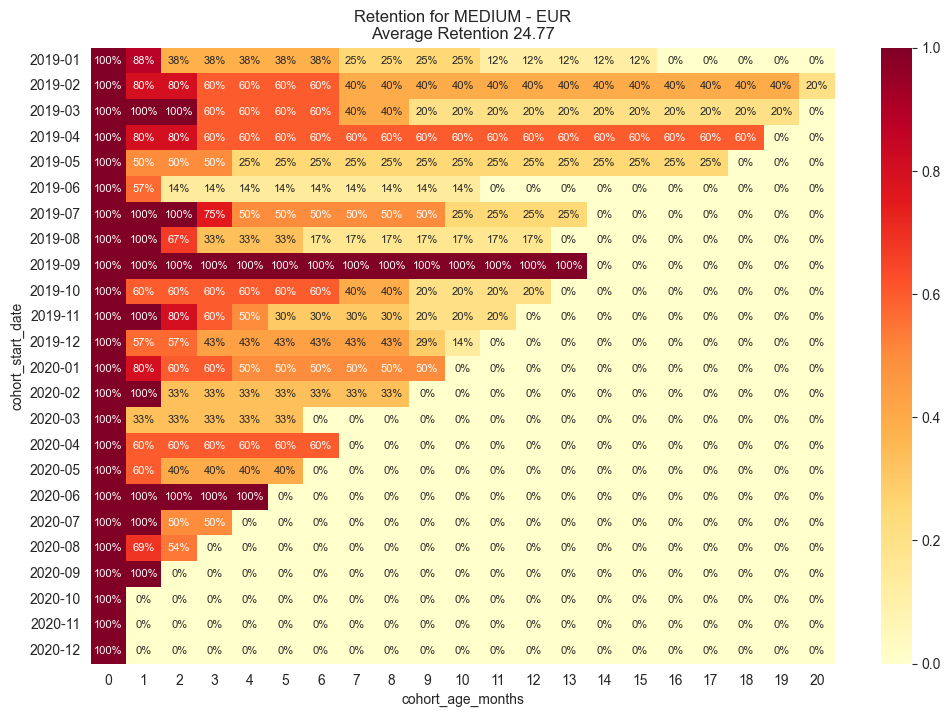

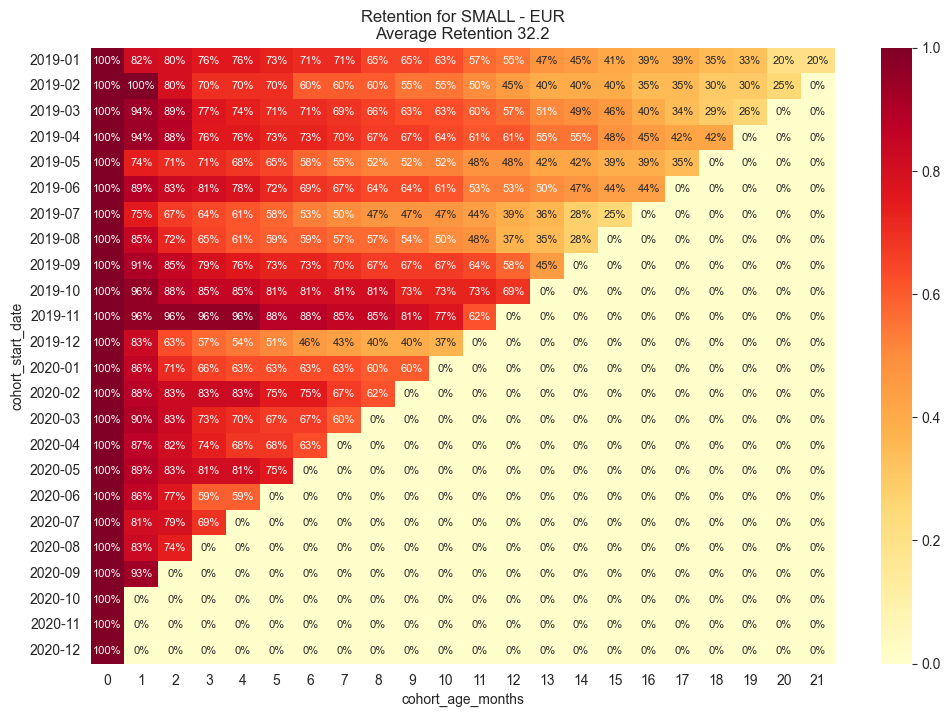

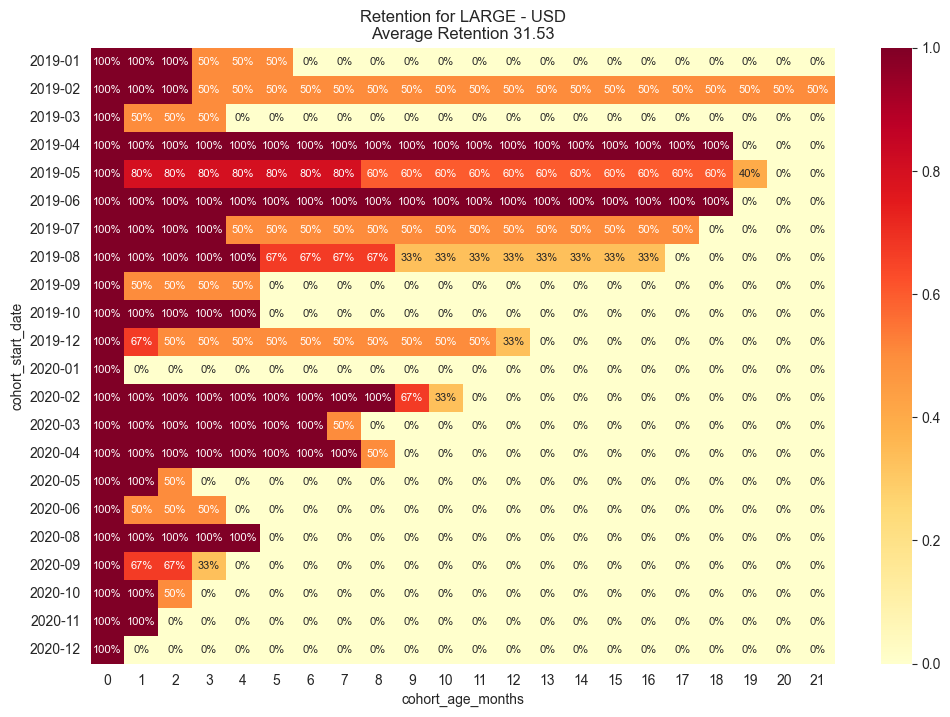

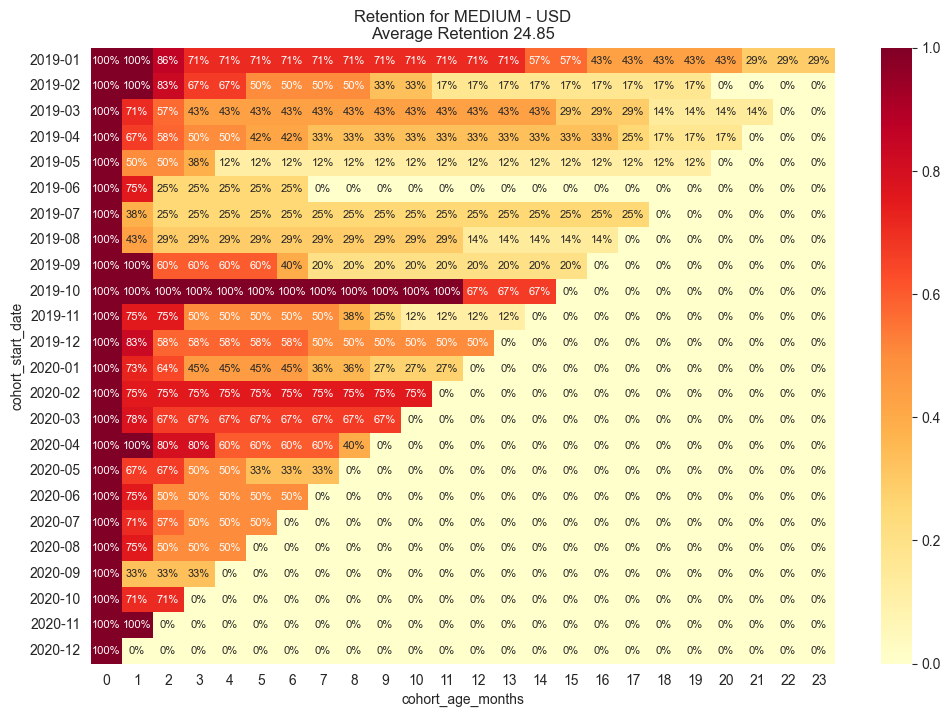

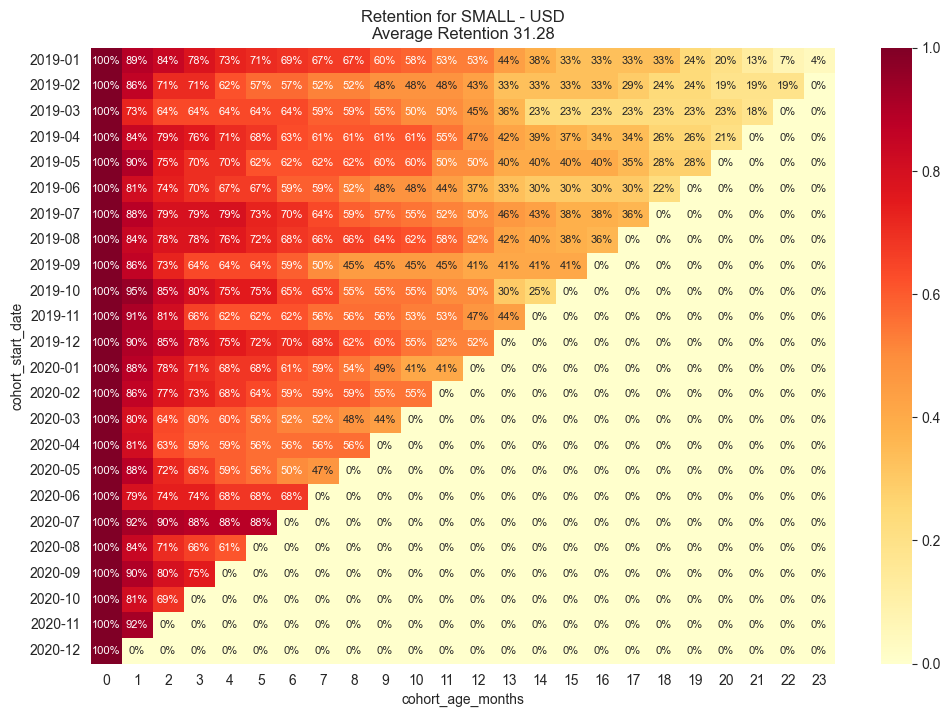

,Plan,Currency,Average Retention %
0,LARGE,EUR,21.51
1,MEDIUM,EUR,24.77
2,SMALL,EUR,32.20
3,LARGE,USD,31.53
4,MEDIUM,USD,24.85
5,SMALL,USD,31.28


In [40]:
avg_retention_dfs = []

for (currency, plan), group in df_grouped:
    # step 1. 
    cohort_pivot = group.pivot_table(index = 'cohort_start_date',
                                      columns = 'cohort_age_months',
                                      values = 'cohort_size_at_order_date',
                                      aggfunc = 'first'
                                     )
    # step 2
    cohort_size = cohort_pivot.iloc[:,0]

    # step 3
    retention_matrix = cohort_pivot.divide(cohort_size, axis = 0).round(2)

    #step 4
    #flat_retention = retention_matrix.values.flatten()
   # not_null_values = retention_matrix[~np.isnan(retention_matrix)]
    # avg_retention = np.mean(not_null_values).round(2)

    # Step 4
    retention_matrix.fillna(0, inplace=True)
    not_null_values = retention_matrix.values.flatten()
    avg_retention = (np.mean(not_null_values) * 100).round(2)

    #step 5
    plt.figure(figsize = (12,8))
    plt.title(f'Retention for {plan} - {currency}\nAverage Retention {avg_retention}')
    sns.heatmap(retention_matrix, cmap = 'YlOrRd', fmt = '.0%', annot = True, annot_kws = {'size':8})
    plt.show()


    # Step 6
    # Create a DataFrame with plan, currency, and average retention rate
    avg_retention_df = pd.DataFrame({'Plan': [plan], 'Currency': [currency], 'Average Retention %': [avg_retention]})

    # Append the DataFrame to the list
    avg_retention_dfs.append(avg_retention_df)

# Concatenate all DataFrames in the list along rows
avg_retention_df = pd.concat(avg_retention_dfs, ignore_index=True)

# Display the DataFrame
avg_retention_df

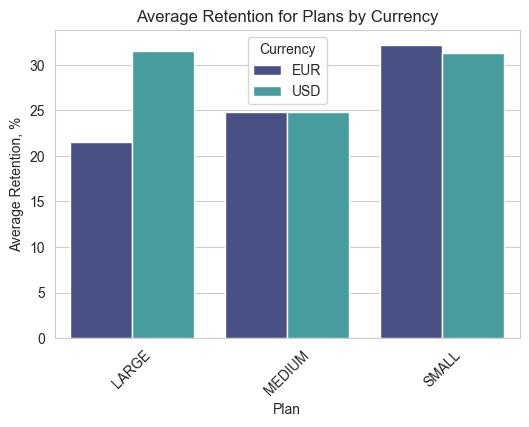

In [41]:
sns.set_style("whitegrid")

plt.figure(figsize=(6, 4))
ax = sns.barplot(x='Plan', y='Average Retention %', hue='Currency', data=avg_retention_df, \
                 palette='mako')
plt.title('Average Retention for Plans by Currency')
plt.xlabel('Plan')
plt.ylabel('Average Retention, %')
plt.legend(title='Currency')
plt.xticks(rotation=45)
plt.show()

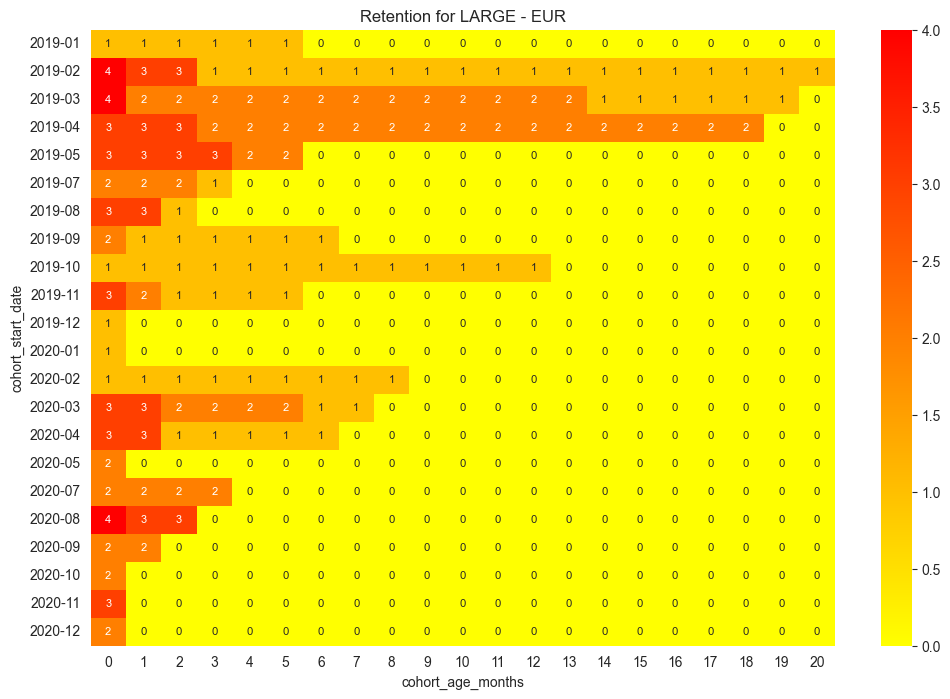

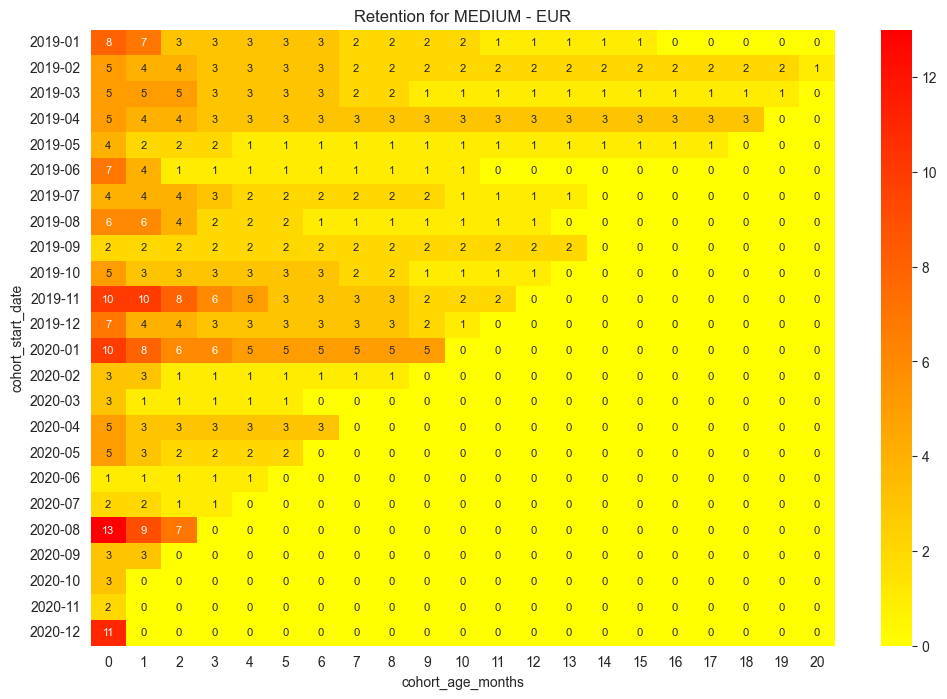

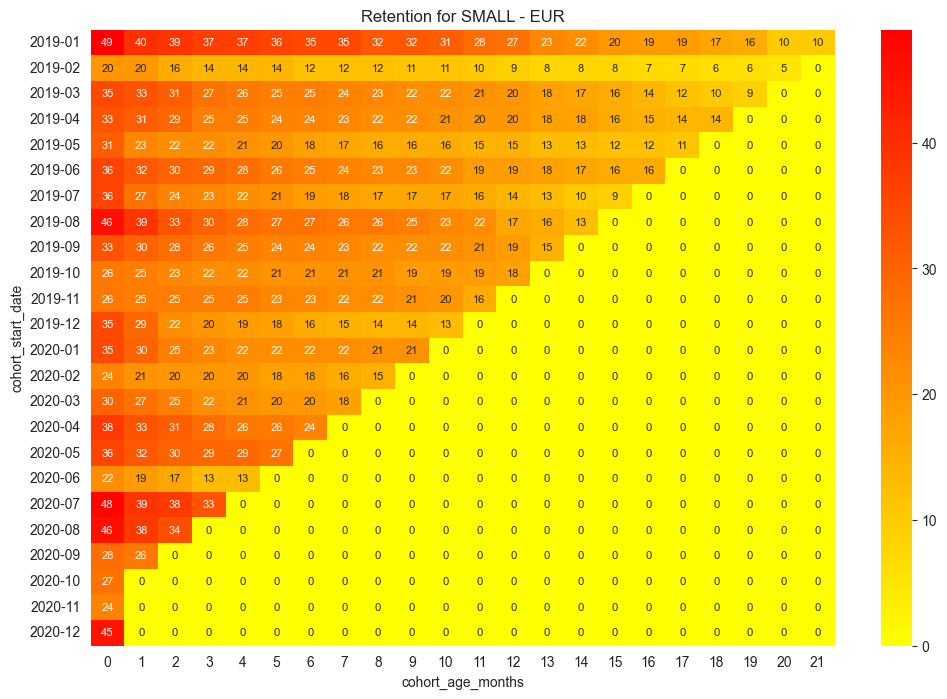

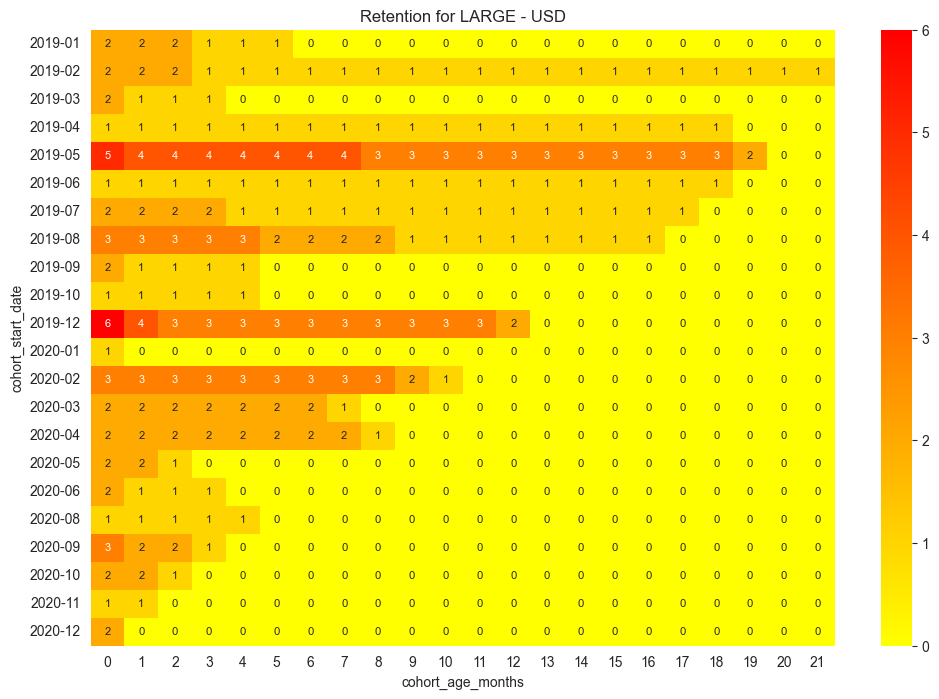

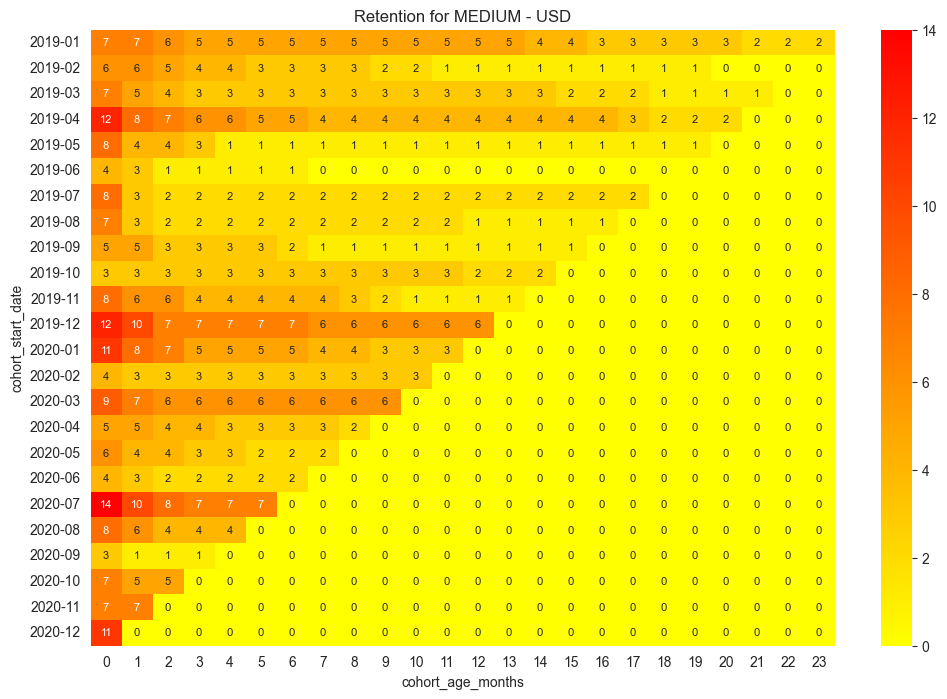

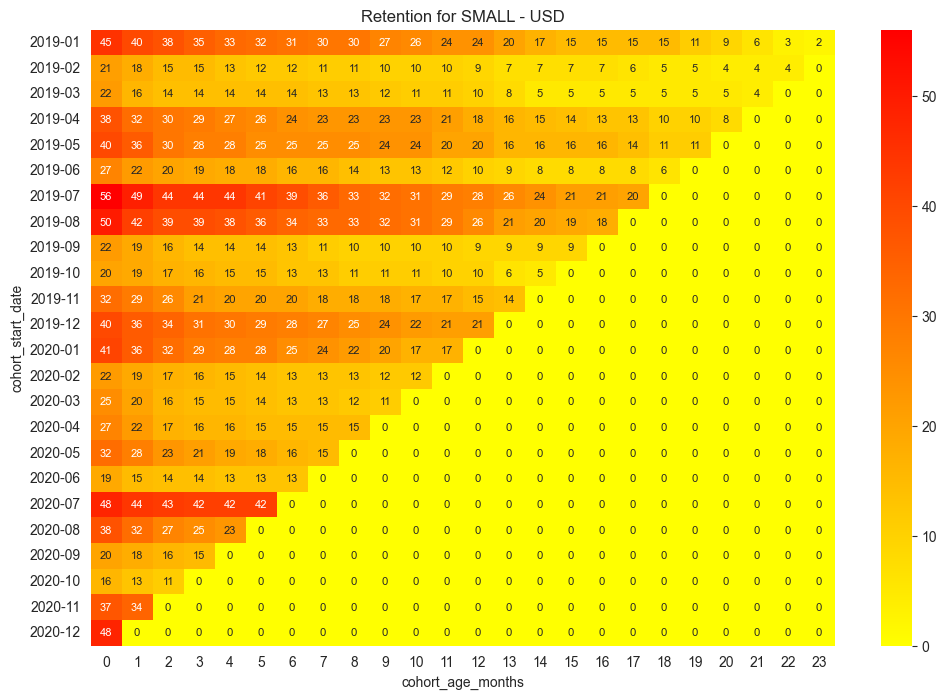

In [42]:
# in absolute numbers
for (currency, plan), group in df_grouped:
    # step 1. 
    cohort_pivot = group.pivot_table(index = 'cohort_start_date',
                                      columns = 'cohort_age_months',
                                      values = 'cohort_size_at_order_date',
                                      aggfunc = 'first'
                                     )

    # Fill null values with 0
    cohort_pivot.fillna(0, inplace=True)

    # Display the Heatmap
    plt.figure(figsize=(12, 8))
    plt.title(f'Retention for {plan} - {currency}')
    sns.heatmap(cohort_pivot, cmap='autumn_r', annot=True, annot_kws={'size': 8})
    plt.show()